<a href="https://colab.research.google.com/github/sona3ms/Week-EDA/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('/content/SVMtrain.csv')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [ ]:
df.shape

(889, 9)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [ ]:
df1 = df.drop(['PassengerId'],axis='columns')
df1.shape

(889, 8)

In [ ]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df1.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Male,22.0,1,0,7.2500,3
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,3
3,1,1,female,35.0,1,0,53.1000,3
4,0,3,Male,35.0,0,0,8.0500,3
5,0,3,Male,60.0,0,0,8.4583,2
6,0,1,Male,54.0,0,0,51.8625,3
7,0,3,Male,2.0,3,1,21.0750,3
8,1,3,female,27.0,0,2,11.1333,3
9,1,2,female,14.0,1,0,30.0708,1


In [ ]:
df2 = df1.drop_duplicates()
df2.shape

(777, 8)

In [ ]:
import seaborn as sns

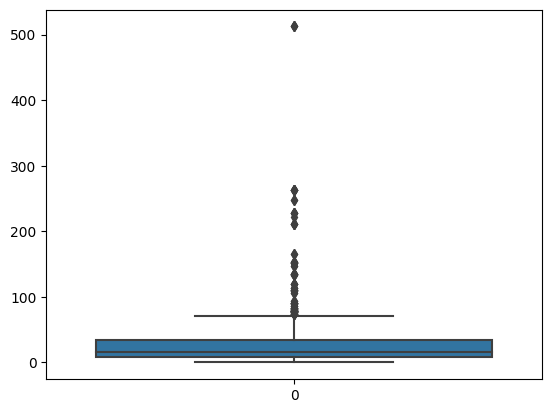

In [ ]:
sns.boxplot(df2['Fare'])
plt.show()

In [ ]:
Q1 = df2['Fare'].quantile(0.25)
Q3 = df2['Fare'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
outliers = df2[(df2['Fare'] < Q1 - 1.5 * IQR) | (df2['Fare'] > Q3 + 1.5 * IQR)]
# Identify potential outliers

In [ ]:
# Remove outliers from the DataFrame
df3 = df2[~((df2['Fare'] < Q1 - 1.5 * IQR) | (df2['Fare'] > Q3 + 1.5 * IQR))]

In [ ]:
df3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_2,Embarked_3
0,0,3,NaN,22.0,1,0,7.2500,0,1
1,1,1,NaN,38.0,1,0,71.2833,0,0
2,1,3,NaN,26.0,0,0,7.9250,0,1
3,1,1,NaN,35.0,1,0,53.1000,0,1
4,0,3,NaN,35.0,0,0,8.0500,0,1


In [ ]:
df3.shape

(677, 9)

In [ ]:
df3['Sex'] = df3['Sex'].fillna('0')

In [ ]:
df3['Sex'] = df3['Sex'].map({'Male': 0, 'female': 1, 'Unknown': 2})

In [ ]:
df3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_2,Embarked_3
0,0,3,NaN,22.0,1,0,7.2500,0,1
1,1,1,NaN,38.0,1,0,71.2833,0,0
2,1,3,NaN,26.0,0,0,7.9250,0,1
3,1,1,NaN,35.0,1,0,53.1000,0,1
4,0,3,NaN,35.0,0,0,8.0500,0,1


In [ ]:
df3['Sex'] = df3['Sex'].fillna('0')

In [ ]:
df3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_2,Embarked_3
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
883,0,3,0,39.0,0,5,29.1250,1,0
885,1,1,0,19.0,0,0,30.0000,0,1
886,0,3,0,60.0,1,2,23.4500,0,1
887,1,1,0,26.0,0,0,30.0000,0,0


In [ ]:
df3.head(8)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_2,Embarked_3
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1
5,0,3,0,60.0,0,0,8.4583,1,0
6,0,1,0,54.0,0,0,51.8625,0,1
7,0,3,0,2.0,3,1,21.0750,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df3.drop('Survived', axis=1)
y = df3['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)